# KMeans & KMeans++

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.spatial import distance

read=pd.read_csv("toydata.txt",names=["x"])

In [2]:
# Check the data

read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
x    500 non-null object
dtypes: object(1)
memory usage: 4.0+ KB


In [3]:
read.head(10)

,x
0,0.501 -0.247
1,0.831 -1.171
2,0.335 0.429
3,0.207 -0.488
4,-0.778 -0.106
5,-0.433 0.104
6,-0.281 0.075
7,-0.934 0.655
8,1.115 -1.000
9,1.379 -1.400


In [4]:
#Preprocess the data
dataX=[]
dataY=[]
for i in read.x:
    dataX.append(float(i.split()[0]))
    dataY.append(float(i.split()[1]))
data=df(columns=("x","y"))
data.x=dataX
data.y=dataY

In [5]:
#Check the data
data.head(10)

,x,y
0,0.501,-0.247
1,0.831,-1.171
2,0.335,0.429
3,0.207,-0.488
4,-0.778,-0.106
5,-0.433,0.104
6,-0.281,0.075
7,-0.934,0.655
8,1.115,-1.000
9,1.379,-1.400


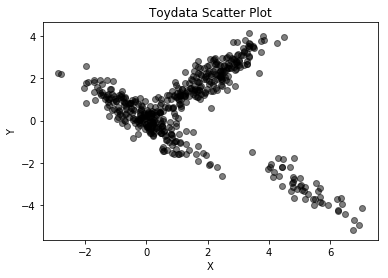

In [6]:
#Plot the data to check the tendency
plt.scatter(data.x,data.y,color="black",alpha=0.5)
plt.title("Toydata Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## KMeans 

In [7]:
# Set the number of cluster

ClusterNumber=3

In [8]:
# Function to check the equality of list.

def CheckEquality(x1,y1,x2,y2):
    if(len(x1) != len(y2)):
        return(False)
    else:
        flag=1
        for i in range(0,len(x1)):
            if(abs(x1[i]-x2[i])<0.001 and abs(y1[i]-y2[i])<0.001):
                flag*=1
            else:
                flag*=0
        return(flag)

In [13]:
def KMEANS(data,SV,CN):
    Flag=0
    cnt=1
    k=CN
    n=len(data)
    Risk=[]      # List for Risk
    center_x=[]  # List for center x
    center_y=[]  # List for center y
    startvalue=SV

    for i in startvalue:
        center_x.append(data.x[i])
        center_y.append(data.y[i])

    while(Flag==0):
        cluster1=[] # List for index of cluster1
        cluster2=[]
        cluster3=[]
        risk=0      # Variabile for risk result.

        c1=[center_x[0],center_y[0]]  # Center of cluster1
        c2=[center_x[1],center_y[1]]
        c3=[center_x[2],center_y[2]]

        for i in range(0,n):
            a=[data.x[i],data.y[i]]

            dist1=distance.euclidean(a,c1)  #Distance between ith obs and c1
            dist2=distance.euclidean(a,c2)
            dist3=distance.euclidean(a,c3)

            if(min(dist1,dist2,dist3)==dist1):
                cluster1.append(i)
                risk+=dist1
            elif(min(dist1,dist2,dist3)==dist2):
                cluster2.append(i)
                risk+=dist2
            else:
                cluster3.append(i)
                risk+=dist3

        Risk.append(risk)

        #New center
        center_xx=[data.x[cluster1].mean(),data.x[cluster2].mean(),data.x[cluster3].mean()]
        center_yy=[data.y[cluster1].mean(),data.y[cluster2].mean(),data.y[cluster3].mean()]

        #Check the new centers are equal to old centers
        if(CheckEquality(center_x,center_y,center_xx,center_yy)==1):
            Flag=1
        else:
            center_x=center_xx
            center_y=center_yy
            cnt+=1
        #End condition
        if(cnt>1000):
            Flag=1
    return(cluster1,cluster2,cluster3,Risk)

In [14]:
# Initial Centroid Intex

startvalue=np.random.choice(range(0,len(read)),3,replace=False)

In [16]:
cluster1,cluster2,cluster3,Risk = KMEANS(data,startvalue,ClusterNumber)

In [17]:
print("The number of iteration is ", len(Risk))

The number of iteration is  15


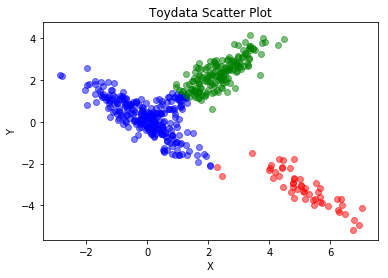

In [18]:
#Plot the result by color
plt.scatter(data.x[cluster1],data.y[cluster1],color="red",alpha=0.5)
plt.scatter(data.x[cluster2],data.y[cluster2],color="blue",alpha=0.5)
plt.scatter(data.x[cluster3],data.y[cluster3],color="green",alpha=0.5)
plt.title("Toydata Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [34]:
RiskStore=[]
for i in range(0,20):
    startvalue=np.random.choice(range(0,len(read)),3,replace=False)
    cluster1,cluster2,cluster3,Risk = KMEANS(data,startvalue,3)
    RiskStore.append(Risk)

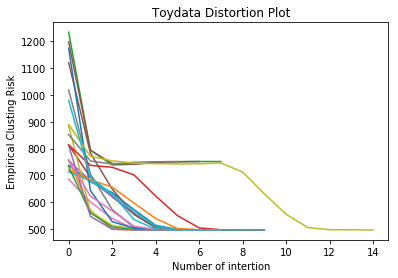

In [35]:
for i in range(0,20):
    plt.plot(RiskStore[i])

plt.title("Toydata Distortion Plot")
plt.xlabel("Number of itertion")
plt.ylabel("Empirical Clusting Risk")
plt.show()

From the plot, the empirical risk is dramatically decreased for two trials, and most of trials converge around 4 iteration.

When the starting points are not good, it takes much trials to converge. 

## (b) KMeans ++

In [36]:
def KMEANSPP(data,CN):
    n=len(data)        # The number of observations
    k=CN               # The number of cluster
    c0=np.random.choice(range(0,n),1,replace=False)[0]
    startvalue=[c0]

    D=[c1]

    MinDist=99999
    MinIndex=0
    for z in range(1,k):
        P=[]           # List for probability
        pi=[]          # List for Distance^2
        for i in range(0,n):
            for j in range(0,len(startvalue)):                  # Compare all of distance with c in C
                a=[data.x[i],data.y[i]]                         # X_i, i=1,2,..n
                b=[data.x[startvalue[j]],data.y[startvalue[j]]] # C_j j=1,2..k
                dd=distance.euclidean(a,b)**2                   # D^2
                if(dd<MinDist):
                    Mindist=dd
                else:
                    pass
            pi.append(Mindist)  # Store min distance to compute probability
            Mindist=99999       # Reset the min
        for i in pi:
            kk=i/(sum(pi))
            P.append(kk)
        temp=np.random.choice(n, 1, p=P)[0]  # New Probability P is used.
        startvalue.append(temp)
    return(startvalue)

In [44]:
# Set startvalue by KMEANS++

startvalue=KMEANSPP(data,ClusterNumber)

In [45]:
cluster1,cluster2,cluster3,Risk = KMEANS(data,startvalue,ClusterNumber)

In [46]:
print("The number of iteration is ", len(Risk))

The number of iteration is  6


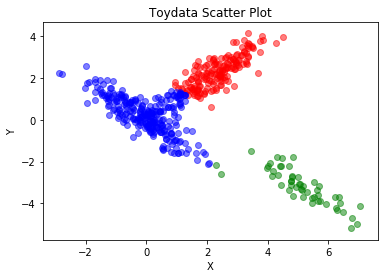

In [47]:
# Plot the result by color

plt.scatter(data.x[cluster1],data.y[cluster1],color="red",alpha=0.5)
plt.scatter(data.x[cluster2],data.y[cluster2],color="blue",alpha=0.5)
plt.scatter(data.x[cluster3],data.y[cluster3],color="green",alpha=0.5)
plt.title("Toydata Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [48]:
RiskStore=[]
for i in range(0,20):
    startvalue=KMEANSPP(data,ClusterNumber)
    cluster1,cluster2,cluster3,Risk = KMEANS(data,startvalue,ClusterNumber)
    RiskStore.append(Risk)

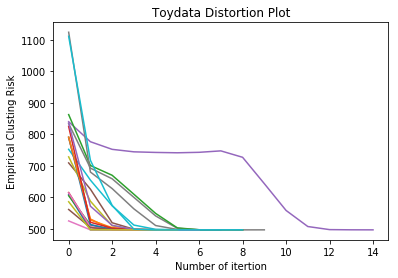

In [49]:
for i in range(0,20):
    plt.plot(RiskStore[i])

plt.title("Toydata Distortion Plot")
plt.xlabel("Number of itertion")
plt.ylabel("Empirical Clusting Risk")
plt.show()

From the result, we can find that the decreasing rate of Empirical Risk is significantly decreased.